In [1]:
import pandas as pd
import numpy as np
import nltk
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
import regex as re
from selenium.webdriver.common.by import By
import warnings
import time
from tqdm.notebook import tqdm
warnings.filterwarnings("ignore")

In [9]:
df=pd.DataFrame(columns=["URL"])
search_url = "https://www.thomasnet.com/suppliers/usa/cnc-machining-45330503"
service = webdriver.ChromeService(executable_path = ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
driver.get(search_url)
time.sleep(10)
url=[]
j=0
for m in range(0,50):
    time.sleep(5)
    ele = driver.find_elements(By.XPATH,'//*[@target="_blank"]')
    #print(len(ele))
    for i in ele:
        #text_list.append(i.text)
        #print(i.text)
        #print(i.get_attribute("href"))
        u=i.get_attribute("href")
        if (('https://www.thomasnet.com/company/' in u)&(u not in url)):
            #print(m,u)
            url.append(u)
            j+=1
    driver.find_element(By.XPATH,'//*[@aria-label="Next Results Page"]').click()
    if j>=120:
            break
driver.quit()
df["URL"]=url
print("Shape:",df.shape,j)
df.head()

Shape: (125, 1) 125


,URL
0,https://www.thomasnet.com/company/ferpa-precis...
1,https://www.thomasnet.com/company/ardel-engine...
2,https://www.thomasnet.com/company/turner-bello...
3,https://www.thomasnet.com/company/source-inter...
4,https://www.thomasnet.com/company/associated-f...


In [10]:
df.tail()

,URL
120,https://www.thomasnet.com/company/dycast-speci...
121,https://www.thomasnet.com/company/g-j-steel-tu...
122,https://www.thomasnet.com/company/estes-design...
123,https://www.thomasnet.com/company/eps-1285610/...
124,https://www.thomasnet.com/company/swift-glass-...


In [ ]:
df.to_csv("KKConnect_data.csv")

In [5]:
df=pd.read_csv('KKConnect_data.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,URL,Name,Location,Text
0,https://www.thomasnet.com/company/ferpa-precis...,"Ferpa Precision Machine, Inc.","Houston, TX 77067",4-axis CNC precision machining services includ...
1,https://www.thomasnet.com/company/ardel-engine...,"Ardel Engineering & Manufacturing Co., Inc.","Minneapolis, MN 55428",Full service precision CNC machining services ...
2,https://www.thomasnet.com/company/turner-bello...,"Turner Bellows, Inc.","Rochester, NY 14606",ISO 9001:2015 woman-owned and HubZone certifie...
3,https://www.thomasnet.com/company/source-inter...,Source International,"Louisville, KY 40206",Custom precision 3-axis to 6-axis vertical and...
4,https://www.thomasnet.com/company/associated-f...,"Associated Fastening Products, Inc.","Itasca, IL 60143",ISO 9001:2015 certified. CNC automatic screw m...


In [11]:
def get_basic_detials(driver:selenium.webdriver.chrome.webdriver.WebDriver):
    Name = driver.find_element(By.XPATH,"//*[@class='mar-0 txt-left pointer']").text
    Loc = driver.find_elements(By.XPATH,'//*[@class="sm:hide"]')[2].text
    return Name,Loc
service = webdriver.ChromeService(executable_path = ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
name = []
loc = []
for i in tqdm(range(0,df.shape[0])):
    url=df.loc[i,"URL"]
    driver.get(url)
    n,l=get_basic_detials(driver)
    name.append(n)
    loc.append(l)
df['Name'] = name
df['Location'] = loc
driver.quit()

  0%|          | 0/125 [00:00<?, ?it/s]

In [12]:
service = webdriver.ChromeService(executable_path = ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
text = []
for i in tqdm(range(0,df.shape[0])):
    url=df.loc[i,"URL"]
    driver.get(url)
    ele = driver.find_elements(By.XPATH,'//*[@class="mar-t-0"]')
    if len(ele)>0:
        text.append(ele[0].text)
    else:
        text.append(' ')
df['Text'] = text
driver.quit()

  0%|          | 0/125 [00:00<?, ?it/s]

In [15]:
df.tail()

,URL,Name,Location,Text
120,https://www.thomasnet.com/company/dycast-speci...,DyCast Specialties Corp.,"Starbuck, MN 56381",CNC machining services for metal die castings....
121,https://www.thomasnet.com/company/g-j-steel-tu...,"G & J Steel & Tubing, Inc.","Hillsborough, NJ 08844",4-axis precision CNC machining services for ap...
122,https://www.thomasnet.com/company/estes-design...,"Estes Design & Manufacturing, Inc.","Indianapolis, IN 46229",ISO 9001:2008 certified sheet metal fabricator...
123,https://www.thomasnet.com/company/eps-1285610/...,EPS,"Alpharetta, GA 30004",ISO 9001:2015 certified. Precision CNC machini...
124,https://www.thomasnet.com/company/swift-glass-...,"Swift Glass Company, Inc.","Elmira, NY 14902",Custom precision CNC machining of glass parts ...


In [16]:
df.head()

,URL,Name,Location,Text
0,https://www.thomasnet.com/company/ferpa-precis...,"Ferpa Precision Machine, Inc.","Houston, TX 77067",4-axis CNC precision machining services includ...
1,https://www.thomasnet.com/company/ardel-engine...,"Ardel Engineering & Manufacturing Co., Inc.","Minneapolis, MN 55428",Full service precision CNC machining services ...
2,https://www.thomasnet.com/company/turner-bello...,"Turner Bellows, Inc.","Rochester, NY 14606",ISO 9001:2015 woman-owned and HubZone certifie...
3,https://www.thomasnet.com/company/source-inter...,Source International,"Louisville, KY 40206",Custom precision 3-axis to 6-axis vertical and...
4,https://www.thomasnet.com/company/associated-f...,"Associated Fastening Products, Inc.","Itasca, IL 60143",ISO 9001:2015 certified. CNC automatic screw m...


In [29]:
df.to_csv("KKConnect_data.csv")
df.head()

,URL,Name,Location,Text,Materials
0,https://www.thomasnet.com/company/ferpa-precis...,"Ferpa Precision Machine, Inc.","Houston, TX 77067",4-axis CNC precision machining services includ...,aluminum brass bronze copper stainless steel...
1,https://www.thomasnet.com/company/ardel-engine...,"Ardel Engineering & Manufacturing Co., Inc.","Minneapolis, MN 55428",Full service precision CNC machining services ...,aluminum stainless steel exotic plastic p...
2,https://www.thomasnet.com/company/turner-bello...,"Turner Bellows, Inc.","Rochester, NY 14606",ISO 9001:2015 woman-owned and HubZone certifie...,aluminum stainless steel exotic plastic p...
3,https://www.thomasnet.com/company/source-inter...,Source International,"Louisville, KY 40206",Custom precision 3-axis to 6-axis vertical and...,metals aluminum carbon steel stainless stee...
4,https://www.thomasnet.com/company/associated-f...,"Associated Fastening Products, Inc.","Itasca, IL 60143",ISO 9001:2015 certified. CNC automatic screw m...,carbon steel brass alloy aluminum copper st...


In [2]:
df=pd.read_csv('KKConnect_data.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,URL,Name,Location,Text
0,https://www.thomasnet.com/company/ferpa-precis...,"Ferpa Precision Machine, Inc.","Houston, TX 77067",4-axis CNC precision machining services includ...
1,https://www.thomasnet.com/company/ardel-engine...,"Ardel Engineering & Manufacturing Co., Inc.","Minneapolis, MN 55428",Full service precision CNC machining services ...
2,https://www.thomasnet.com/company/turner-bello...,"Turner Bellows, Inc.","Rochester, NY 14606",ISO 9001:2015 woman-owned and HubZone certifie...
3,https://www.thomasnet.com/company/source-inter...,Source International,"Louisville, KY 40206",Custom precision 3-axis to 6-axis vertical and...
4,https://www.thomasnet.com/company/associated-f...,"Associated Fastening Products, Inc.","Itasca, IL 60143",ISO 9001:2015 certified. CNC automatic screw m...


In [22]:
clean_text=["working","materials","working","and","including","with","works","worked","include","tool","cnc machining services","work","also",
            "such as"]
mm=[]
df["Text"]=df["Text"].astype('str')
for i in range(0,len(df)):
    jj=df["Text"][i].lower().split('.')
    for j in jj:
        if ((('works with ' in j)|('working with' in j))|(('materials' in j)|(('working with' in j)))):
            materials = re.findall(r'\b(\w+(?: \w+)*)(?:,|$)*', j)
            for k in range(0,len(materials)):
                for l in clean_text:
                    if "other materials" in materials[k]:
                        continue
                    if l in materials[k]:
                        if l=="materials" and "exotic" in materials[k]:
                            continue
                        elif "other materials"==materials[k]:
                            continue
                        elif l !="and":
                            materials[k]=materials[k].replace(l,"")
                        else:
                            temp = materials[k].split("and")
                            temp[0] = temp[0]
                            materials[k]=temp[0]
                            materials.append(temp[1])
            #print(i,materials)
    kkb=','.join(materials)
    if len(kkb)==0:
        kkb=[]
    mm.append(kkb)
    #print(df["Text"][i].split('.'))
df["Materials"]=mm

In [23]:
df.head(10)

,URL,Name,Location,Text,Materials,Certification,Process,Industry,Machinary
0,https://www.thomasnet.com/company/ferpa-precis...,"Ferpa Precision Machine, Inc.","Houston, TX 77067",4-axis CNC precision machining services includ...,"aluminum,brass,bronze,copper,stainless steel...",AS9100,"milling,turning","aerospace,defense,energy,medical,subsea","4-axis,CNC,CNC,precision"
1,https://www.thomasnet.com/company/ardel-engine...,"Ardel Engineering & Manufacturing Co., Inc.","Minneapolis, MN 55428",Full service precision CNC machining services ...,"aluminum,stainless,steel,exotic ,plastic p...",null,"milling,turning,grinding,heat treating,convers...","aerospace,medical,computer,military","CNC,grind,CNC,machining"
2,https://www.thomasnet.com/company/turner-bello...,"Turner Bellows, Inc.","Rochester, NY 14606",ISO 9001:2015 woman-owned and HubZone certifie...,"aluminum,stainless,steel,exotic ,plastic p...","ISO 9001:2015,HubZone,ITAR,SBA","milling,thread cutting,tapping,thread grinding","medical,automotive,construction","vertical,horizontal,CNC,grind,CNC,machining"
3,https://www.thomasnet.com/company/source-inter...,Source International,"Louisville, KY 40206",Custom precision 3-axis to 6-axis vertical and...,"metals, aluminum,carbon steel,stainless stee...","ASTM,ANSI,RoHS,WEEE,IPC 1752-1,AS9100,UL","milling,boring,drilling,tapping,EDM,cutting,cu...",,"3-axis,6-axis,vertical,horizontal,CNC,grind,CN..."
4,https://www.thomasnet.com/company/associated-f...,"Associated Fastening Products, Inc.","Itasca, IL 60143",ISO 9001:2015 certified. CNC automatic screw m...,"carbon steel,brass,alloy,aluminum,copper,st...","ISO 9001:2015,Mil-I-4528,QS 14000","turning,milling,drilling,tapping,broaching,gri...","automotive,transportation","CNC,Machining includes,grind"
5,https://www.thomasnet.com/company/star-manufac...,"Star Manufacturing, Ltd.","Seguin, TX 78155",Precision CNC machining services including mil...,metals,null,"milling,turning","semiconductor,appliance,automotive","CNC,CNC,machining"
6,https://www.thomasnet.com/company/eagle-stainl...,"Eagle Stainless Tube & Fabrication, Inc.","Franklin, MA 02038",Precision CNC Swiss and laser machining servic...,"staniless steel tubing types 304 , 316 in bo...",null,"electrical discharge machining,EDM","electronics,aerospace,semiconductor,energy,med...","CNC,laser,machining"
7,https://www.thomasnet.com/company/wyandotte-in...,"Wyandotte Industries, Inc.","Wyandotte, MI 48192",Precision CNC Swiss machining services for hea...,"alloy steel,carbon steel,bronze,copper,stain...","AS 9100,NADCAP,QSLM,TS 16949",,"electronics,aerospace,agricultural,energy,appl...","CNC,CNC,Swiss machining"
8,https://www.thomasnet.com/company/g-v-industri...,"G. V. Industries, Inc.","National City, CA 91950","3, 4, and 5-axis precision CNC machining servi...","aluminum,bronze,copper,stainless steel,super...",null,"milling,turning,band sawing,electrical dischar...","aerospace,automotive,defense,medical","5-axis,CNC,vertical,horizontal,CNC,machining"
9,https://www.thomasnet.com/company/national-tec...,National Technologies,"Oak Creek, WI 53154",Precision CNC machining services for OEM compo...,"steel,stainless steel,aluminum,brass,bronze,...","APQP,NJSU,ASQ","turning,tapping,drilling,boring,broaching,gear...","aerospace,defense,agricultural,automotive,cons...","CNC,CNC,machining"


In [24]:
mm=[]
df["Text"]=df["Text"].astype('str')
ddd=r'\b(ISO \d{4}:\d{4}\b|Mil-Spec|HubZone|NADCAP|SBA|QSLM|TS \d{4,}|CE|CSA|RoHS|Six Sigma|ITAR|WEEE|IPC \d{4,}-\d{1}|AS\d{4,}|UL|APQP|NJSU|ASQ|AWS|QLM|SAE|ANSI|ASTM|ASQC-Q\d{4,}|Mil-I-\d{4,}||QS \d{5,}|AS\d{4}D|AS \d{4,}|TS \d{5,}|IPC \d{4,}-\d{1})'
for i in range(0,len(df)):
    jj=df["Text"][i].split('.')
    m=""
    for j in jj:
        if ((('Meets' in j)|('certified' in j))|(('meets' in j)|(('meet' in j)|('registered' in j)))):
            cert = re.findall(ddd,j)
            cert = [x for x in cert if x]
            cert = ','.join(cert)
            if len(m)!=0:
                m+=","
            m+=cert
    mm.append(m)
df["Certification"]=mm

In [89]:
df.to_csv("KKConnect_data.csv")
df.head()

,URL,Name,Location,Text,Materials,Certification
0,https://www.thomasnet.com/company/ferpa-precis...,"Ferpa Precision Machine, Inc.","Houston, TX 77067",4-axis CNC precision machining services includ...,aluminum brass bronze copper stainless steel...,AS9100
1,https://www.thomasnet.com/company/ardel-engine...,"Ardel Engineering & Manufacturing Co., Inc.","Minneapolis, MN 55428",Full service precision CNC machining services ...,aluminum stainless steel exotic plastic p...,
2,https://www.thomasnet.com/company/turner-bello...,"Turner Bellows, Inc.","Rochester, NY 14606",ISO 9001:2015 woman-owned and HubZone certifie...,aluminum stainless steel exotic plastic p...,"ISO 9001:2015,HubZone,ITAR,SBA"
3,https://www.thomasnet.com/company/source-inter...,Source International,"Louisville, KY 40206",Custom precision 3-axis to 6-axis vertical and...,metals aluminum carbon steel stainless stee...,"ASTM,ANSI,RoHS,WEEE,IPC 1752-1,AS9100,UL"
4,https://www.thomasnet.com/company/associated-f...,"Associated Fastening Products, Inc.","Itasca, IL 60143",ISO 9001:2015 certified. CNC automatic screw m...,carbon steel brass alloy aluminum copper st...,"ISO 9001:2015,Mil-I-4528,QS 14000"


In [3]:
df=pd.read_csv('KKConnect_data.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,URL,Name,Location,Text,Materials,Certification
0,https://www.thomasnet.com/company/ferpa-precis...,"Ferpa Precision Machine, Inc.","Houston, TX 77067",4-axis CNC precision machining services includ...,aluminum brass bronze copper stainless steel...,AS9100
1,https://www.thomasnet.com/company/ardel-engine...,"Ardel Engineering & Manufacturing Co., Inc.","Minneapolis, MN 55428",Full service precision CNC machining services ...,aluminum stainless steel exotic plastic p...,NaN
2,https://www.thomasnet.com/company/turner-bello...,"Turner Bellows, Inc.","Rochester, NY 14606",ISO 9001:2015 woman-owned and HubZone certifie...,aluminum stainless steel exotic plastic p...,"ISO 9001:2015,HubZone,ITAR,SBA"
3,https://www.thomasnet.com/company/source-inter...,Source International,"Louisville, KY 40206",Custom precision 3-axis to 6-axis vertical and...,metals aluminum carbon steel stainless stee...,"ASTM,ANSI,RoHS,WEEE,IPC 1752-1,AS9100,UL"
4,https://www.thomasnet.com/company/associated-f...,"Associated Fastening Products, Inc.","Itasca, IL 60143",ISO 9001:2015 certified. CNC automatic screw m...,carbon steel brass alloy aluminum copper st...,"ISO 9001:2015,Mil-I-4528,QS 14000"


In [25]:
# Define regex patterns
machinery_pattern = r'(CNC|cnc|laser|LASER) (machine|machining|lathe|mill|turning|screw machining|Swiss machining|edm|wire edm|precision) '
process_pattern = r'(milling|turning|band sawing|electrical discharge machining|edm|fabrication|assembly|welding|thread cutting|tapping|thread grinding|grinding|honning|heat treating|conversion coating|anodizing|boring|drilling|tapping|internal forming|knurling|gear hobbing|broaching|cutting|counterboring|countersinking)'
industry_pattern = r'(aerospace|aviation|defense|energy|medical|subsea|automotive|transportation|construction|marine|agricultural|appliance|electronics|semiconductor|heavy equipment|oil and gas|green energy|military|computer)'
machine_pattern  = r'\b(\d{1,}-axis|CNC|\d{1,} CNC|Machining includes|vertical|horizontal|grind*|blast*)'
# Define text
text = df["Text"].astype(str).to_list() # Your text here
p_process =[]
p_industry=[]
p_final_machinery=[]
# Find matches
for t in text:
    machinery = re.findall(machinery_pattern, t, re.IGNORECASE)
    process = re.findall(process_pattern, t, re.IGNORECASE)
    industry = re.findall(industry_pattern, t, re.IGNORECASE)
    machine = re.findall(machine_pattern,t,re.IGNORECASE)
    industry = [x for x in industry if x]
    process = [x for x in process if x]
    machine = [x for x in machine if x]
    final_machinery = [x for x in machine if x]
    for i in machinery:
        if len(i)>1:
            for x in i:
                final_machinery.append(x)
        else:
            final_machinery.append(i)
    industry = ','.join(industry)
    process = ','.join(process)
    final_machinery = ','.join(final_machinery)
    p_process.append(process)
    p_industry.append(industry)
    p_final_machinery.append(final_machinery)

df["Process"] = p_process
df["Industry"] = p_industry
df["Machinary"] = p_final_machinery
df.head()

,URL,Name,Location,Text,Materials,Certification,Process,Industry,Machinary
0,https://www.thomasnet.com/company/ferpa-precis...,"Ferpa Precision Machine, Inc.","Houston, TX 77067",4-axis CNC precision machining services includ...,"aluminum,brass,bronze,copper,stainless steel...",AS9100,"milling,turning","aerospace,defense,energy,medical,subsea","4-axis,CNC,CNC,precision"
1,https://www.thomasnet.com/company/ardel-engine...,"Ardel Engineering & Manufacturing Co., Inc.","Minneapolis, MN 55428",Full service precision CNC machining services ...,"aluminum,stainless,steel,exotic ,plastic p...",,"milling,turning,grinding,heat treating,convers...","aerospace,medical,computer,military","CNC,grind,CNC,machining"
2,https://www.thomasnet.com/company/turner-bello...,"Turner Bellows, Inc.","Rochester, NY 14606",ISO 9001:2015 woman-owned and HubZone certifie...,"aluminum,stainless,steel,exotic ,plastic p...","ISO 9001:2015,HubZone,ITAR,SBA","milling,thread cutting,tapping,thread grinding","medical,automotive,construction","vertical,horizontal,CNC,grind,CNC,machining"
3,https://www.thomasnet.com/company/source-inter...,Source International,"Louisville, KY 40206",Custom precision 3-axis to 6-axis vertical and...,"metals, aluminum,carbon steel,stainless stee...","ASTM,ANSI,RoHS,WEEE,IPC 1752-1,AS9100,UL","milling,boring,drilling,tapping,EDM,cutting,cu...",,"3-axis,6-axis,vertical,horizontal,CNC,grind,CN..."
4,https://www.thomasnet.com/company/associated-f...,"Associated Fastening Products, Inc.","Itasca, IL 60143",ISO 9001:2015 certified. CNC automatic screw m...,"carbon steel,brass,alloy,aluminum,copper,st...","ISO 9001:2015,Mil-I-4528,QS 14000","turning,milling,drilling,tapping,broaching,gri...","automotive,transportation","CNC,Machining includes,grind"


In [26]:
mxm = ["Materials","Certification","Process","Industry","Machinary"]
col_unique={}
for i in mxm:
    ans=[]
    tt=df[i].astype(str).to_list()
    for t in tt:
        n=t.split(',')
        for nx in n:
            nx=nx.replace(' ','')
            nx=nx.lower()
            if nx not in ans and nx!='':
                ans.append(nx)
    col_unique[i]=ans
for i in col_unique.keys():
    print(i,len(col_unique[i]))

Materials 176
Certification 25
Process 24
Industry 19
Machinary 20


In [28]:
df.head()

,URL,Name,Location,Text,Materials,Certification,Process,Industry,Machinary
0,https://www.thomasnet.com/company/ferpa-precis...,"Ferpa Precision Machine, Inc.","Houston, TX 77067",4-axis CNC precision machining services includ...,"aluminum,brass,bronze,copper,stainless steel...",AS9100,"milling,turning","aerospace,defense,energy,medical,subsea","4-axis,CNC,CNC,precision"
1,https://www.thomasnet.com/company/ardel-engine...,"Ardel Engineering & Manufacturing Co., Inc.","Minneapolis, MN 55428",Full service precision CNC machining services ...,"aluminum,stainless,steel,exotic ,plastic p...",,"milling,turning,grinding,heat treating,convers...","aerospace,medical,computer,military","CNC,grind,CNC,machining"
2,https://www.thomasnet.com/company/turner-bello...,"Turner Bellows, Inc.","Rochester, NY 14606",ISO 9001:2015 woman-owned and HubZone certifie...,"aluminum,stainless,steel,exotic ,plastic p...","ISO 9001:2015,HubZone,ITAR,SBA","milling,thread cutting,tapping,thread grinding","medical,automotive,construction","vertical,horizontal,CNC,grind,CNC,machining"
3,https://www.thomasnet.com/company/source-inter...,Source International,"Louisville, KY 40206",Custom precision 3-axis to 6-axis vertical and...,"metals, aluminum,carbon steel,stainless stee...","ASTM,ANSI,RoHS,WEEE,IPC 1752-1,AS9100,UL","milling,boring,drilling,tapping,EDM,cutting,cu...",,"3-axis,6-axis,vertical,horizontal,CNC,grind,CN..."
4,https://www.thomasnet.com/company/associated-f...,"Associated Fastening Products, Inc.","Itasca, IL 60143",ISO 9001:2015 certified. CNC automatic screw m...,"carbon steel,brass,alloy,aluminum,copper,st...","ISO 9001:2015,Mil-I-4528,QS 14000","turning,milling,drilling,tapping,broaching,gri...","automotive,transportation","CNC,Machining includes,grind"


In [29]:
new_df=df[["Name","Location"]].copy(deep=True)
print(new_df.shape)
for i in col_unique.keys():
    z = [str('Encode_'+i+'_'+name) for name in col_unique[i] ]
    #df_add=pd.DataFrame(columns=z)
    new_df[z]=0
    for index,data in df.iterrows():
        if pd.isnull(data[i]):
            continue
        n=data[i].split(',')
        for nx in n:
            nx=nx.replace(' ','')
            nx=nx.lower()
            if nx!='':
                new_df.loc[index,str('Encode_'+i+'_'+nx)]=1
    #new_df = pd.concat([new_df,df_add])
new_df.head()

(125, 2)


,Name,Location,Encode_Materials_aluminum,Encode_Materials_brass,Encode_Materials_bronze,Encode_Materials_copper,Encode_Materials_stainlesssteel,Encode_Materials_titanium,Encode_Materials_superalloy,Encode_Materials_polyester,...,Encode_Machinary_laser,Encode_Machinary_swissmachining,Encode_Machinary_5-axis,Encode_Machinary_turning,Encode_Machinary_8-axis,Encode_Machinary_2-axis,Encode_Machinary_lathe,Encode_Machinary_7-axis,Encode_Machinary_9-axis,Encode_Machinary_blast
0,"Ferpa Precision Machine, Inc.","Houston, TX 77067",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,"Ardel Engineering & Manufacturing Co., Inc.","Minneapolis, MN 55428",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Turner Bellows, Inc.","Rochester, NY 14606",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Source International,"Louisville, KY 40206",1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Associated Fastening Products, Inc.","Itasca, IL 60143",1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.to_csv('KKConnect_data.csv')
new_df.to_csv('KKConnect_data_encoding.csv')

In [31]:
new_df.shape

(125, 266)

In [32]:
new_df=new_df.fillna(0)
new_df.shape

(125, 266)

In [39]:
new_df=new_df.loc[new_df["Encode_Industry_aerospace"]==1,]
print(new_df.shape)

(58, 266)


In [69]:
from sklearn.decomposition import LatentDirichletAllocation
import plotly.express as px
lda = LatentDirichletAllocation(n_components=3,random_state=0)
lda.fit(new_df.drop(['Name','Location'],axis=1))
X=lda.transform(new_df.drop(['Name','Location'],axis=1))
fig = px.scatter_3d(X, x=0, y=1, z=2,width=800, height=800)
fig.show()

Text(0, 0.5, 'Inertia')

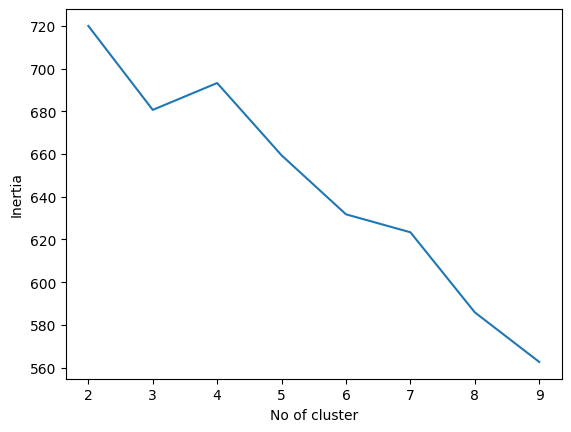

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
rr=[]
inertia=[]
ss=[]
for i in range(2,10):
    neigh = KMeans(n_clusters=i)
    rr.append(i)
    neigh.fit(new_df.drop(['Name','Location'],axis=1))
    inertia.append(neigh.inertia_)
    ss.append(round(silhouette_score(new_df.drop(['Name','Location'],axis=1),neigh.labels_),3))
plt.plot(rr,inertia)
plt.xlabel("No of cluster")
plt.ylabel("Inertia")

Text(0, 0.5, 'Silhoutte Score')

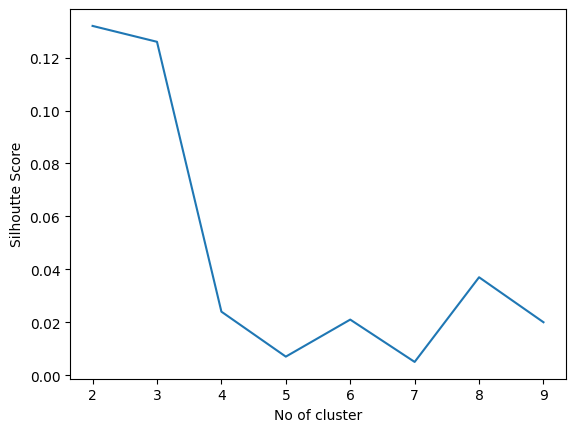

In [71]:
plt.plot(rr,ss)
plt.xlabel("No of cluster")
plt.ylabel("Silhoutte Score")

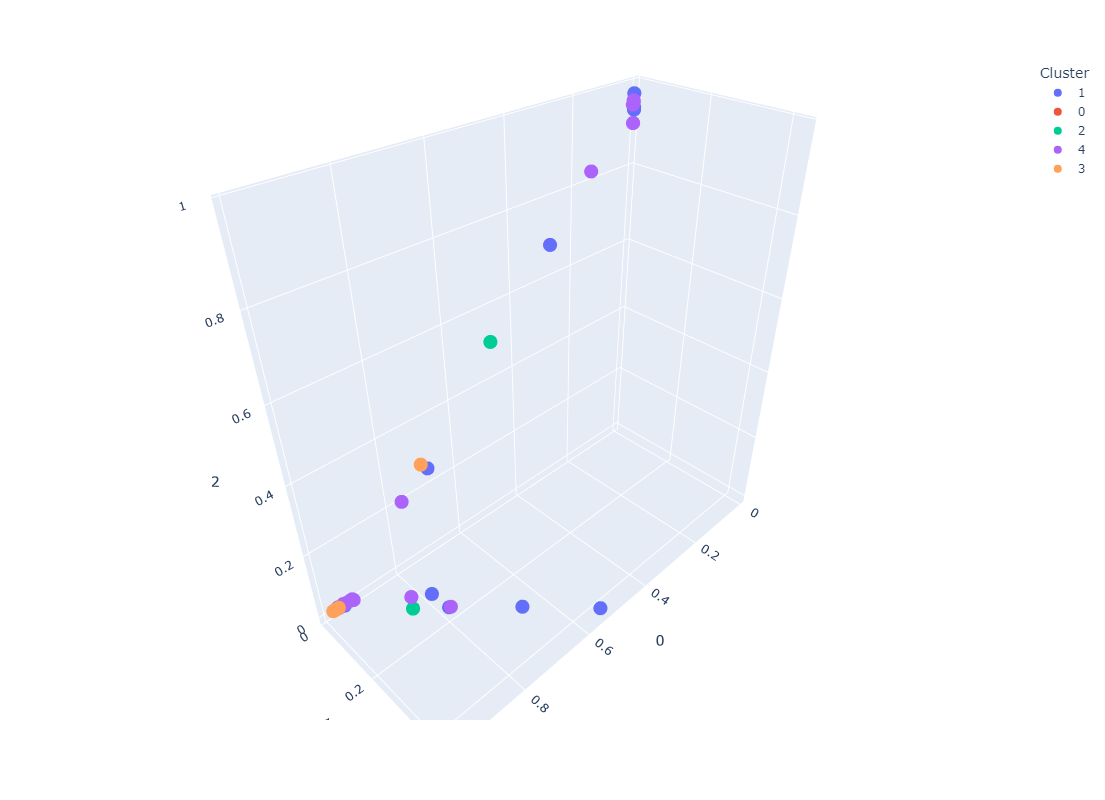

In [63]:
neigh = KMeans(n_clusters=5)
neigh.fit(new_df.drop(['Name','Location'],axis=1))
cl=neigh.labels_
dfff=pd.DataFrame(X)
kk=cl.tolist()
dfff["Cluster"]=cl
dfff["Cluster"]=dfff["Cluster"].astype('category')
fig = px.scatter_3d(dfff, x=0, y=1, z=2,color="Cluster",width=1000, height=800)
fig.show()

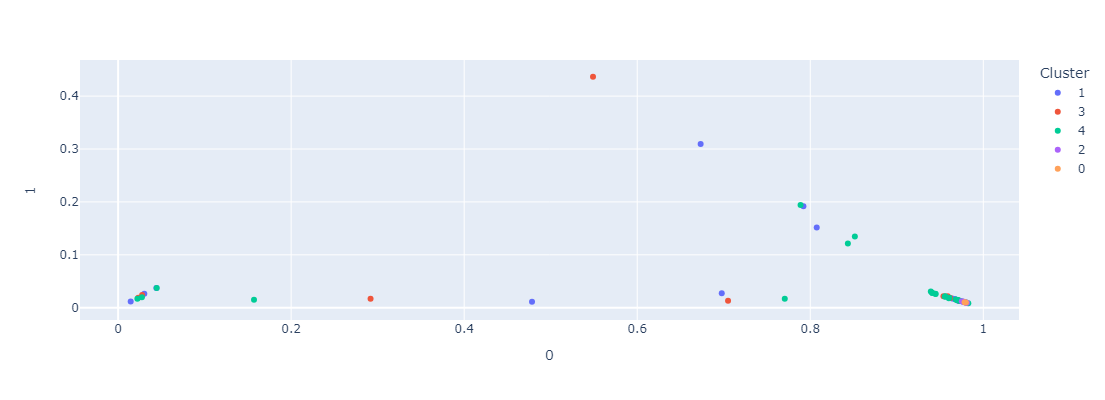

In [62]:
lda = LatentDirichletAllocation(n_components=3,random_state=0)
lda.fit(new_df.drop(['Name','Location'],axis=1))
X_2D=lda.transform(new_df.drop(['Name','Location'],axis=1))
dfff=pd.DataFrame(X_2D)
dfff["Cluster"]=cl
dfff["Cluster"]=dfff["Cluster"].astype('category')
fig = px.scatter(dfff, x=0, y=1,color="Cluster",width=800, height=400)
fig.show()

In [64]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=3).fit_transform(new_df.drop(['Name','Location'],axis=1))
dfff=pd.DataFrame(X_embedded)
kk=cl.tolist()
dfff["Cluster"]=cl
dfff["Cluster"]=dfff["Cluster"].astype('category')
fig = px.scatter_3d(dfff, x=0, y=1, z=2,color="Cluster",width=1000, height=800)
fig.show()

In [14]:
data[i]

nan